In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

Read csv

In [92]:
df = pd.read_csv('/content/UBER.csv')

In [93]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [94]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
720,2022-03-18,32.520000,33.419998,32.330002,33.360001,33.360001,35779700
721,2022-03-21,32.820000,32.820000,31.250000,31.980000,31.980000,35200600
722,2022-03-22,31.930000,33.599998,31.840000,33.349998,33.349998,21852800
723,2022-03-23,32.709999,33.680000,32.570000,33.060001,33.060001,19024700
724,2022-03-24,34.740002,34.950001,33.439999,34.700001,34.700001,52492200


In [95]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,40.166447,40.961435,39.261123,40.107255,40.107255,2.472855e+07
std,9.198940,9.259164,9.075919,9.141862,9.141862,1.691406e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.730000,33.419998,31.983000,32.799999,32.799999,1.423060e+07
50%,39.000000,39.959999,38.009998,38.810001,38.810001,2.079540e+07
75%,46.700001,47.520000,45.860001,46.419998,46.419998,3.011960e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


In [96]:
df.shape

(725, 7)

Data Cleaning

In [97]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [98]:
df = df.drop_duplicates()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       725 non-null    object 
 1   Open       725 non-null    float64
 2   High       725 non-null    float64
 3   Low        725 non-null    float64
 4   Close      725 non-null    float64
 5   Adj Close  725 non-null    float64
 6   Volume     725 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 39.8+ KB


Import required libraries

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

ADD COLMNS FOR THE DAY THAT ENDED WITH PROFIT


In [101]:
df['profit'] = df['Close']-df['Open']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,profit
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,-0.430000
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,-1.690003
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.649998
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.920002
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.520000


In [102]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,profit
720,2022-03-18,32.520000,33.419998,32.330002,33.360001,33.360001,35779700,0.840001
721,2022-03-21,32.820000,32.820000,31.250000,31.980000,31.980000,35200600,-0.840000
722,2022-03-22,31.930000,33.599998,31.840000,33.349998,33.349998,21852800,1.419998
723,2022-03-23,32.709999,33.680000,32.570000,33.060001,33.060001,19024700,0.350002
724,2022-03-24,34.740002,34.950001,33.439999,34.700001,34.700001,52492200,-0.040001


In [103]:
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']
df['open-close'] = df['Open'] - df['Close']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,profit,open-high,open-low,close-high,close-low,high-low,open-close
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,-0.430000,-3.000000,0.939999,-3.430000,0.509999,3.939999,0.430000
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,-1.690003,-0.450001,2.709999,-2.140004,1.019996,3.160000,1.690003
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.649998,-1.649998,1.460003,0.000000,3.110001,3.110001,-1.649998
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.920002,-2.510002,0.419998,-0.590000,2.340000,2.930000,-1.920002
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.520000,-2.580001,0.230000,-1.060001,1.750000,2.810001,-1.520000


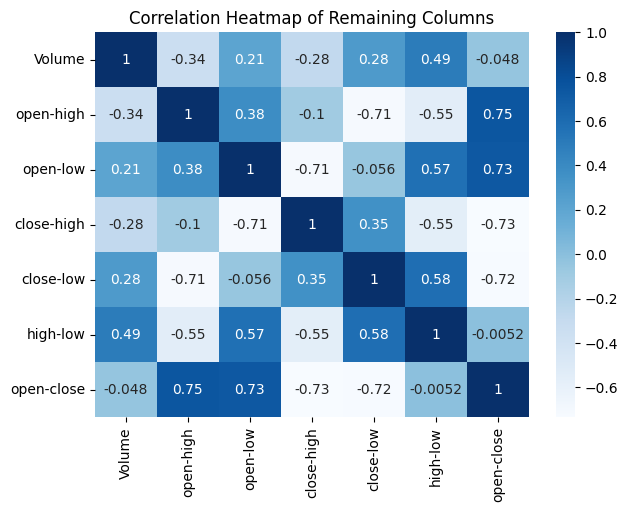

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame and drop the specified columns
data2 = df.copy()
data2 = data2.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'profit'], axis=1)

# Ensure that only numeric columns are left in data2
data2 = data2.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for the correlation matrix of the remaining numeric columns
plt.figure(figsize=(7, 5))
sns.heatmap(data2.corr(), cmap='Blues', annot=True)
plt.title('Correlation Heatmap of Remaining Columns')
plt.show()

PREDICTIONS


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from datetime import datetime, timedelta

In [106]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [107]:
df['Days'] = (df.index - df.index.min()).days

In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [110]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [111]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [112]:
# Predict on the entire dataset
df['LR_Predicted'] = lr_model.predict(X)
df['RF_Predicted'] = rf_model.predict(X)
df['GB_Predicted'] = gb_model.predict(X)

In [113]:
# Plotting Actual vs Predicted
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

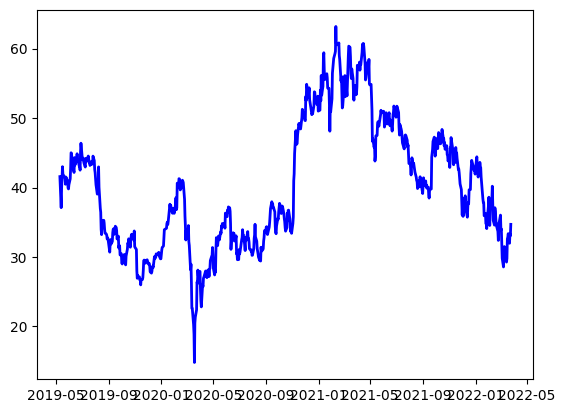

In [114]:
# Plot actual data
plt.plot(df.index, df['Close'], color='blue', label='Actual Stock Price', linewidth=2)

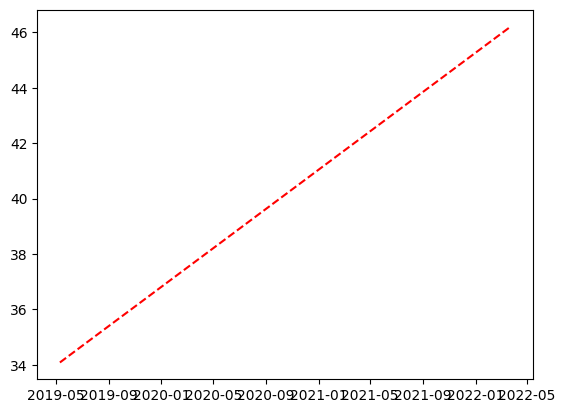

In [115]:
# Plot Linear Regression predictions
plt.plot(df.index, df['LR_Predicted'], color='red', linestyle='--', label='Linear Regression Prediction')

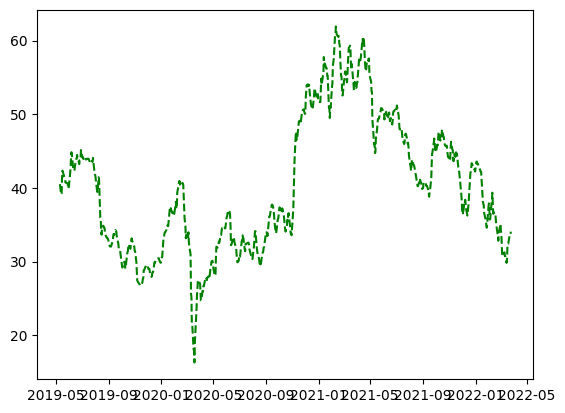

In [116]:
# Plot Random Forest predictions
plt.plot(df.index, df['RF_Predicted'], color='green', linestyle='--', label='Random Forest Prediction')

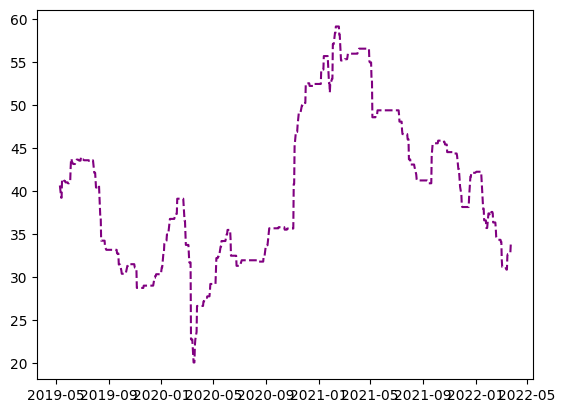

In [117]:
# Plot Gradient Boosting predictions
plt.plot(df.index, df['GB_Predicted'], color='purple', linestyle='--', label='Gradient Boosting Prediction')

In [118]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [120]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [121]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [122]:
# Get predictions for the test set
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [123]:
# Create a DataFrame to display actual vs predicted values
predictions_df = pd.DataFrame({
    'Date': X_test.index,
    'Actual Price': y_test,
    'LR Predicted Price': lr_predictions,
    'RF Predicted Price': rf_predictions,
    'GB Predicted Price': gb_predictions
})

In [124]:
# Sort the DataFrame by the Date index for better readability
predictions_df.set_index('Date', inplace=True)  # Set Date as the index to sort by it
predictions_df.sort_index(inplace=True)  # Sort by the index (which is Date)

In [125]:
# Display the predictions
print(predictions_df)

            Actual Price  LR Predicted Price  RF Predicted Price  \
Date                                                               
2019-05-14     39.959999           34.127443           39.237099   
2019-05-24     41.509998           34.243084           40.716101   
2019-06-13     44.310001           34.474367           42.440399   
2019-06-24     43.090000           34.601573           43.230400   
2019-06-25     43.090000           34.613137           43.786200   
...                  ...                 ...                 ...   
2022-02-25     34.980000           45.899744           34.105399   
2022-03-07     28.570000           46.015385           30.908000   
2022-03-18     33.360001           46.142591           32.401999   
2022-03-21     31.980000           46.177283           33.479199   
2022-03-23     33.060001           46.200411           33.479199   

            GB Predicted Price  
Date                            
2019-05-14           39.227836  
2019-05-24      